# 空间数据格式

我们将了解对水文科学相关的两种主要空间数据格式：矢量和栅格。

## 1. 关于空间矢量数据

矢量数据是由被称为顶点的离散几何位置（x、y值）组成的，它定义了空间对象的 "形状"。顶点的组织决定了你所处理的矢量的类型。有三种类型的矢量数据。

- 点 : 每个单独的点都由一个X、Y坐标定义。点数据的例子包括：采样地点、单个树木的位置或地块的位置。
- 线 : 线由许多（至少2个）顶点或点组成，这些顶点是连接在一起的。例如，一条道路或一条河流可以用一条线来表示。这条线是由一系列线段组成的，道路或溪流中的每一个 "弯 "都代表一个顶点，有明确的x、y位置。
- 多边形 : 一个多边形由3个或更多的顶点组成，这些顶点是连接和 "封闭 "的。因此，地块边界、湖泊、海洋、州或国家的轮廓通常由多边形表示。

### 1.2 存储点、线和多边形的Shapefile文件格式简介

矢量格式的地理空间数据通常以shapefile格式（.shp）存储。由于点、线和多边形的结构不同，每个单独的shapefile只能包含一种矢量类型（所有点、所有线或所有多边形）。我们不会在一个单一的shapefile中找到点、线和多边形的混合对象。

存储在shapefile中的对象通常有一组描述数据的相关属性。例如，一个包含溪流位置的线状图文件可能还包含相关的溪流名称、溪流 "顺序 "和关于每个溪流线对象的其他信息。

下面读取一个河流的shp文件

In [1]:
#导入读取shp文件的依赖包
import shapefile

In [2]:
#读取shp文件
file = shapefile.Reader('GPL0.shp')

In [3]:
#读取元数据
print(str(file.shapeType))  # 输出shp类型
print(file.encoding)# 输出shp文件编码
print(file.bbox)  # 输出shp的文件范围（外包矩形）
print(file.numRecords)  # 输出shp文件的要素数据
print(file.fields)# 输出所有字段信息

3
utf-8
[115.5234001870001, 39.48286125900006, 135.0859822860001, 53.56072436300008]
55
[('DeletionFlag', 'C', 1, 0), ['Id', 'N', 9, 0], ['RVCD', 'C', 15, 0], ['RVNM', 'C', 50, 0], ['PHNCD', 'C', 10, 0], ['PBSCD', 'C', 10, 0], ['Shape_Leng', 'F', 19, 11]]


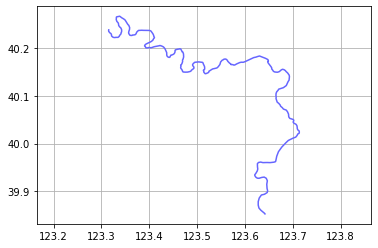

In [4]:
from matplotlib import pyplot as plt

border_shape = file
# 通过创建reader类的对象进行shapefile文件的读取
# border_points
border = border_shape.shapes()
# .shapes()读取几何数据信息，存放着该文件中所有对象的 几何数据
# border是一个列表
border_points = border[0].points
#print(border_points)# 返回第1个对象的所有点坐标
#border_points = [(x1,y1),(x2,y2),(x3,y3),…]

x, y = zip(*border_points)
# x=(x1,x2,x3,…)
# y=(y1,y2,y3,…)

fig, ax = plt.subplots()  # 生成一张图和一张子图
# plt.plot(x,y,'k-') # x横坐标 y纵坐标 ‘k-’线性为黑色
plt.plot(x, y, color='#6666ff', label='fungis')  # x横坐标 y纵坐标 ‘k-’线性为黑色
ax.grid()  # 添加网格线
ax.axis('equal')
plt.show()

### 1.3 哪些数据是以空间矢量格式存储的？

通常以矢量格式提供的数据的一些例子包括:

- 人口普查数据，包括城市边界
- 道路、电力线和其他基础设施的边界
- 政治边界
- 建筑物的轮廓
- 水体和河流系统
- 生态边界
- 城市位置
- 物体位置，包括地块、河流测量仪和建筑位置

## 2. 将栅格数据用于地球数据科学

### 2.1 什么是栅格数据？

栅格或 "网格 "数据以数值的网格形式存储，在地图上以像素形式呈现。每个像素值代表地球表面的一个区域，使数据具有空间性。栅格文件是由规则的单元格组成的，所有单元格的大小都是一样的。我们在谷歌地球等工具中看过照片或图像，就曾看过和使用过栅格。然而，我们使用的栅格文件与照片不同，因为它们是有空间参照的。每个像素代表地面上的一个区域。这个区域是由栅格的空间分辨率定义的。

栅格是由一个有规律的单元格组成的。每个单元在X和Y方向上都是相同的大小

栅格数据可以有一个或多个层。例如，一个高程模型通常只有一层，代表一个特定地点的地球表面的高程。然而，其他数据，包括图像和时间序列数据，可能会产生一个由多层组成的栅格文件。不同的文件类型可以用来容纳不同大小和结构的栅格数据。

有许多不同的文件类型被用来存储栅格数据，例如以单个文件存储栅格数据：

- `.tif/.tiff `：代表标签图像文件格式，是最常见的存储栅格数据的方式之一。。
- `.asc`: 代表ASCII光栅文件。这是一种基于文本的格式，用于存储栅格数据。

### 2.2 哪些类型的数据被存储在栅格中？

通常以栅格格式提供的数据的一些例子包括：

- 卫星图像
- 大面积的土地利用
- 高程数据
- 天气数据
- 水深测量数据

## 第1课：将栅格数据用于水文学科

### Ⅰ. 什么是栅格数据？

栅格或 "网格 "数据以数值的网格形式存储，在地图上以像素形式呈现。每个像素值代表地球表面的一个区域，使数据具有空间性。栅格文件是由规则的单元格组成的，所有单元格的大小都是一样的。我们在谷歌地球等工具中看过照片或图像，就曾看过和使用过栅格。然而，我们使用的栅格文件与照片不同，因为它们是有空间参照的。每个像素代表地面上的一个区域。这个区域是由栅格的空间分辨率定义的。

栅格是由一个有规律的单元格组成的。每个单元在X和Y方向上都是相同的大小

栅格数据可以有一个或多个层。例如，一个高程模型通常只有一层，代表一个特定地点的地球表面的高程。然而，其他数据，包括图像和时间序列数据，可能会产生一个由多层组成的栅格文件。不同的文件类型可以用来容纳不同大小和结构的栅格数据。

有许多不同的文件类型被用来存储栅格数据，例如以单个文件存储栅格数据：

- `.tif/.tiff `：代表标签图像文件格式，是最常见的存储栅格数据的方式之一。。
- `.asc`: 代表ASCII光栅文件。这是一种基于文本的格式，用于存储栅格数据。

### Ⅱ. 哪些类型的数据被存储在栅格中？

通常以栅格格式提供的数据的一些例子包括：

- 卫星图像
- 大面积的土地利用
- 高程数据
- 天气数据
- 水深测量数据

### Ⅲ. 关于空间矢量数据

矢量数据是由被称为顶点的离散几何位置（x、y值）组成的，它定义了空间对象的 "形状"。顶点的组织决定了你所处理的矢量的类型。有三种类型的矢量数据。

- 点 : 每个单独的点都由一个X、Y坐标定义。点数据的例子包括：采样地点、单个树木的位置或地块的位置。
- 线 : 线由许多（至少2个）顶点或点组成，这些顶点是连接在一起的。例如，一条道路或一条河流可以用一条线来表示。这条线是由一系列线段组成的，道路或溪流中的每一个 "弯 "都代表一个顶点，有明确的x、y位置。
- 多边形 : 一个多边形由3个或更多的顶点组成，这些顶点是连接和 "封闭 "的。因此，地块边界、湖泊、海洋、州或国家的轮廓通常由多边形表示。

### Ⅳ. 存储点、线和多边形的Shapefile文件格式简介

矢量格式的地理空间数据通常以shapefile格式（.shp）存储。由于点、线和多边形的结构不同，每个单独的shapefile只能包含一种矢量类型（所有点、所有线或所有多边形）。我们不会在一个单一的shapefile中找到点、线和多边形的混合对象。

存储在shapefile中的对象通常有一组描述数据的相关属性。例如，一个包含溪流位置的线状图文件可能还包含相关的溪流名称、溪流 "顺序 "和关于每个溪流线对象的其他信息。

### Ⅴ. 哪些数据是以空间矢量格式存储的？

通常以矢量格式提供的数据的一些例子包括:

- 人口普查数据，包括城市边界
- 道路、电力线和其他基础设施的边界
- 政治边界
- 建筑物的轮廓
- 水体和河流系统
- 生态边界
- 城市位置
- 物体位置，包括地块、河流测量仪和建筑位置